In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Основные понятия
### 1.1. Генеральная совокупность и выборка
Создадим генеральную совокупность, распределённую нормально.

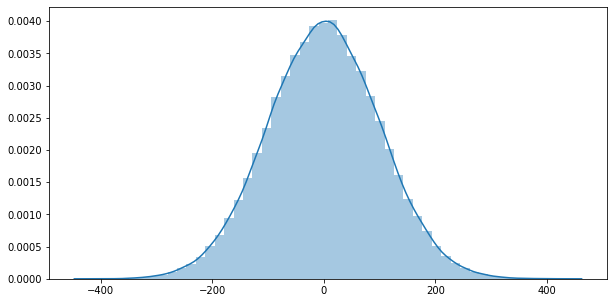

In [2]:
# кол-во объектов
n = 100000
# математическое ожидание (среднее)
n_mean = 0
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю)
n_sigma = 100
# синтезируем нормальное распределение
norm_distr = np.random.normal(n_mean, n_sigma, n)
# посмотрим на получившееся распределение
fig = plt.figure(figsize=(10, 5))
sns.distplot(norm_distr, bins=50)
plt.show()

### 1.2. Меры центральной тенденции.  
**Минимум, максимум, среднее, медиана.**

In [3]:
# отсортируем по возрастанию
norm_distr_sort = np.sort(norm_distr)
# минимум
min_ = norm_distr_sort[0]
##print('Minimum =', min_)
min_ = norm_distr.min()
##print('Minimum =', min_)
# максимум
max_ = norm_distr_sort[-1]
##print('Maximum =', max_)
max_ = norm_distr.max()
##print('Maximum =', max_)
# среднее
sum_ = 0
for i in norm_distr:
    sum_ += i
mean_ = sum_ / len(norm_distr)
##print('Mean =',mean_)
sum_ = norm_distr.sum()
mean_ = sum_ / len(norm_distr)
##print('Mean =',mean_)
mean_ = norm_distr.mean()
##print('Mean =', mean_)
# медиана
if len(norm_distr_sort)%2==1:
    median_ = norm_distr_sort[int(len(norm_distr_sort)/2)]
else:
    index = int(len(norm_distr_sort)/2)
    median_ = (norm_distr_sort[index-1] + norm_distr_sort[index]) / 2
##print('Median =', median_)
median_ = np.median(norm_distr)
##print('Median =', median_)

### 1.3. Меры изменчивости.
**Размах, дисперсия, среднеквадратическое отклонение.**

In [4]:
range_ = max_ - min_
print('Range =', range_)
# дисперсия
variance = np.mean((norm_distr - norm_distr_sort.mean())**2)
print('Variance =', variance)
# СКО
sd = np.sqrt(variance)
print('Standart deviation =', sd)

Range = 845.658429790617
Variance = 9969.951590344777
Standart deviation = 99.84964491847118


### 1.4. Квантили распределения.
**Количественная трактовка**: Квантили это числа выборки (популяции), слева от которых расположено кол-во наблюдений, которое они означают. Т.е. 0.25 квантиль означает, что чисел, котрые меньше этого 25% из всей выборки.

**Вероятностная трактовка**: квантили это семейство оценок, отвечающих на вопрос – какое значение случайная величины не превысит с заданной вероятностью.  
Полезно для поиска аномальных значений, выбросов. Чаще всего на практике используются квартили – квантили с вероятностями
0.25, 0.5, 0.75, разделяющие всю совокупность возможных исходов на четыре равных промежутка. 0.5 квартиль в статистике еще называют медианой. Персентиль это квантиль * 100 %.

quantile 0.5 - 0.4480045229388311
quartile 2 - 0.4480045229388311
percentile 50 - 0.4480045229388311
median - 0.4480045229388311

quantile 0.25 - -67.20645831970424
quartile 1 - -67.20685684469058
percentile 25 - -67.20645831970424

quantile 0.75 - 67.71083546491167
quartile 3 - 67.71148679729481
percentile 75 - 67.71083546491167

Interquantile range - 134.9183436419854


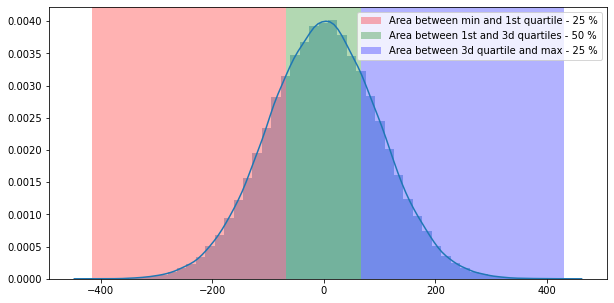

In [5]:
# квантиль 0.5, второй квартиль, 50-ый персентиль, медиана
quantile_05 = np.quantile(norm_distr, 0.5)
quartile_2 = np.median(norm_distr)
percentile_50 = np.percentile(norm_distr, 50)
print('quantile 0.5 - {}\nquartile 2 - {}\npercentile 50 - {}\nmedian - {}\n'.\
      format(quantile_05, quartile_2, percentile_50, median_))

# квантиль 0.25, первый квартиль, 25-ый персентиль
quantile_025 = np.quantile(norm_distr, 0.25)
quartile_1 = np.median(norm_distr[norm_distr<quantile_05])
percentile_25 = np.percentile(norm_distr, 25)
print('quantile 0.25 - {}\nquartile 1 - {}\npercentile 25 - {}\n'\
.format(quantile_025, quartile_1, percentile_25))

# квантиль 0.75, третий квартиль, 75-ый персентиль
quantile_075 = np.quantile(norm_distr, 0.75)
quartile_3 = np.median(norm_distr[norm_distr>quantile_05])
percentile_75 = np.percentile(norm_distr, 75)
print('quantile 0.75 - {}\nquartile 3 - {}\npercentile 75 - {}\n'\
.format(quantile_075, quartile_3, percentile_75))

# интерквартильный размах
iqr = quartile_3 - quartile_1
print('Interquantile range -', iqr)

fig = plt.figure(figsize=(10, 5))
sns.distplot(norm_distr, bins=50)
plt.axvspan(min_, quartile_1, facecolor='r', alpha=0.3,
label='Area between min and 1st quartile - 25 %')
plt.axvspan(quartile_1, quartile_3, facecolor='g', alpha=0.3,
label='Area between 1st and 3d quartiles - 50 %')
plt.axvspan(quartile_3, max_, facecolor='b', alpha=0.3,
label='Area between 3d quartile and max - 25 %')
plt.legend()
plt.show()

### 1.5. График box-plot.

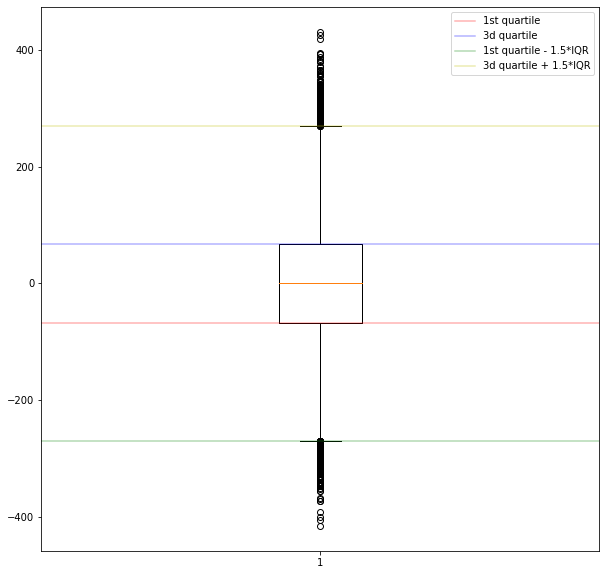

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.boxplot(norm_distr)
plt.axhline(quartile_1, c='r', alpha=0.3, label='1st quartile')
plt.axhline(quartile_3, c='b', alpha=0.3, label='3d quartile')
plt.axhline(quartile_1-1.5*iqr, c='g', alpha=0.3, label='1st quartile - 1.5*IQR')
plt.axhline(quartile_3+1.5*iqr, c='y', alpha=0.3, label='3d quartile + 1.5*IQR')
plt.legend()
plt.show()

### 1.6. Нормальное распределение. Стандартизация (z-преобразование).

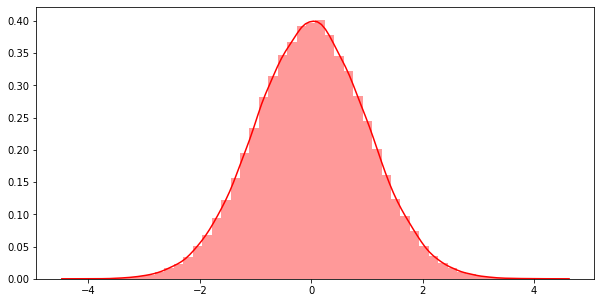

In [7]:
z_norm_distr = (norm_distr - mean_) / sd
fig = plt.figure(figsize=(10, 5))
sns.distplot(z_norm_distr, bins=50, color='r')
plt.show()

# mean +- sigma ~ 68 % наблюдений
# mean +- 2*sigma ~ 95 % наблюдений
# mean +- 3*sigma ~ 100 % наблюдений


### Negative Z-score table
Use the negative Z score table below to find values on the left of the mean as can be seen in the graph alongside. Corresponding values which are less than the mean are marked with a negative score in the z-table and respresent the area under the bell curve to the left of z.

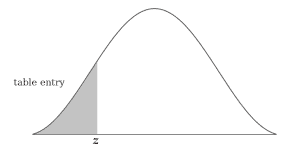

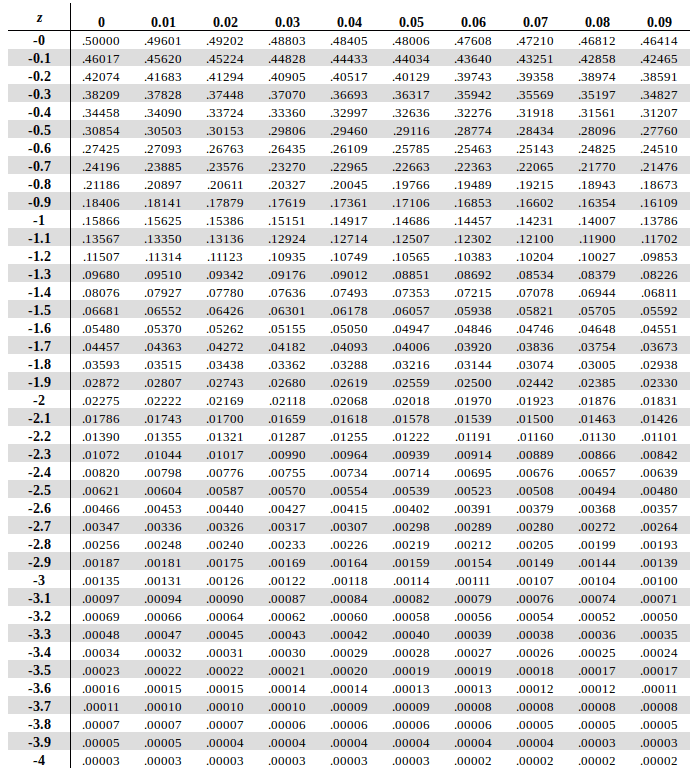

### Positive Z-score table
Use the positive Z score table below to find values on the right of the mean as can be seen in the graph alongside. Corresponding values which are greater than the mean are marked with a positive score in the z-table and respresent the area under the bell curve to the left of z.

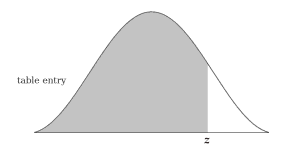

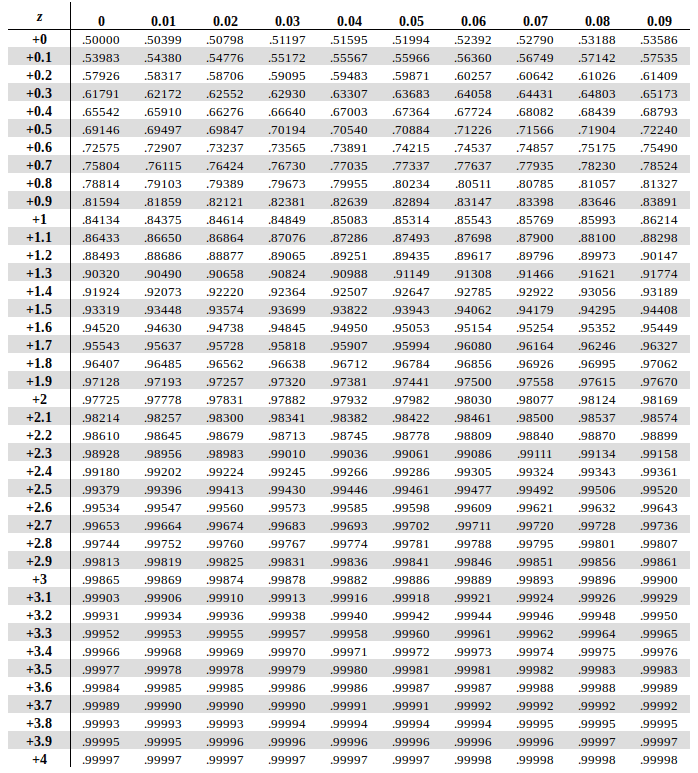

### Calculating the *z score* of a *p-value* and vice versa

In [8]:
import scipy.stats as st


p_value = 0.95
z_score = st.norm.ppf(p_value)
z_score

1.6448536269514722

In [9]:
z_score = 1.65
p_value = st.norm.cdf(z_score)
p_value

0.9505285319663519

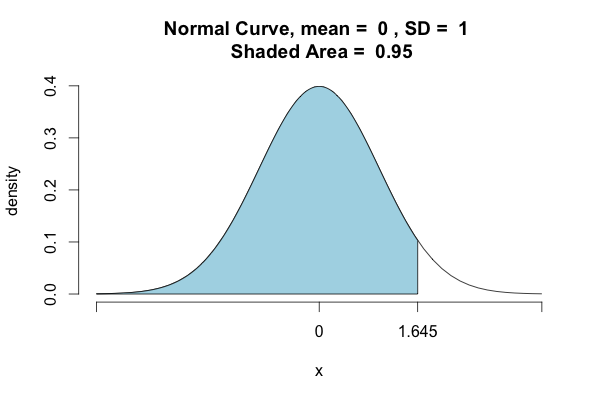

As other users noted, Python calculates left/lower-tail probabilities by default. If you want to determine the density points where 95% of the distribution is included, you have to take another approach:

In [10]:
z_score_left = st.norm.ppf(.025)
z_score_right = st.norm.ppf(.975)
print('left: {}, right: {}'.format(z_score_left, z_score_right))

left: -1.9599639845400545, right: 1.959963984540054


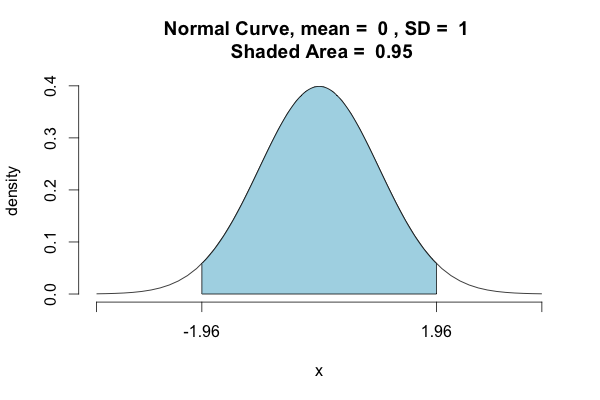

### 1.7. Центральная предельная теорема.
Сразу введем все переменные:  
$\mu$ - среднее генеральной совокупности (n_mean_pop)  
$\sigma$  - стандартное отклонение генеральной совокупности (n_sigma_pop)

$n$ - размер выборки (n_sample)  
$\overline{x}$ - выборочное среднее (sample_mean)  
$sd$ - среднеквадратичное отклонение выборки (sd_sample)  
$se = \frac{\sigma}{\sqrt{n}}$ - стандартная (ошибка) отклонение среднего (se)

**Теорема:**  
Пусть у нас есть генеральная совокупность со средним значением $\mu$ и стандартным отклонением $\sigma$. Если мы извлечем из этой совокупности все возможные выборки достаточно большого размера $n$ $(n \geq 30)$ и посчитаем по каждой выборке среднее значение, то эти средние значения будут примерно нормально распределены со средним $\mu$ и стандартным отклонением $\frac{\sigma}{\sqrt{n}}$.

Итак, благодаря центральной предельной теореме, мы знаем, что распределение средних выборочных значений является нормальным. Важно то, что это выполняется вне зависимости от того, какое распределение имеет генеральная совокупность. Даже если генеральная совокупность имеет какое-то неизвестное распределение, если мы возьмем много достаточно больших выборок из него и посчитаем их средние значения, эти средние будут распределены нормально. 

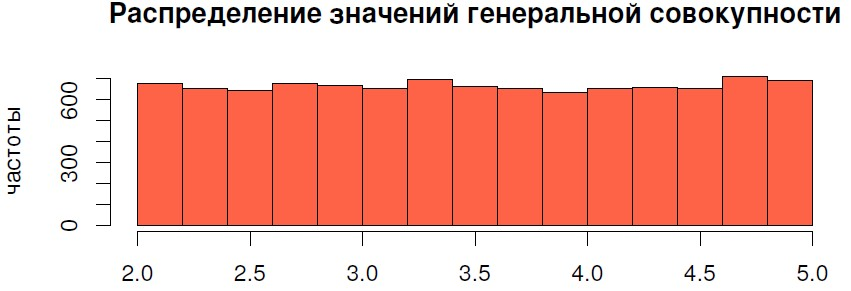

![%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D1%8B%D1%85%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85%20%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.jpg](attachment:%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D1%8B%D1%85%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85%20%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.jpg)

Практика изучения случайных явлений показывает, что хотя результаты отдельных наблюдений, даже проведенных в одинаковых условиях, могут сильно отличаться, в то же время средние результаты для достаточно большого числа наблюдений устойчивы и слабо зависят от результатов отдельных наблюдений. Теоретическим обоснованием этого замечательного свойства случайных явлений является ***закон больших чисел***.

Перейдем к рассмотрению статистики относительно выборок.  
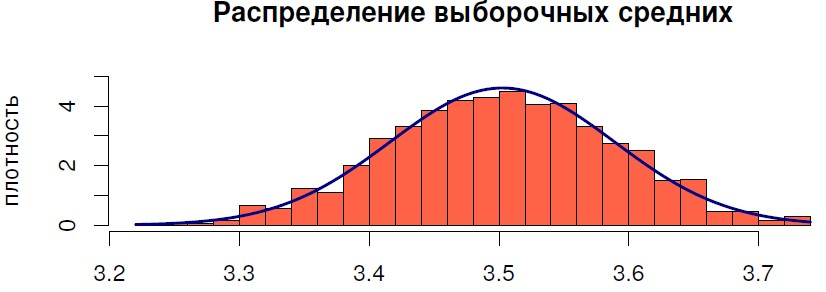

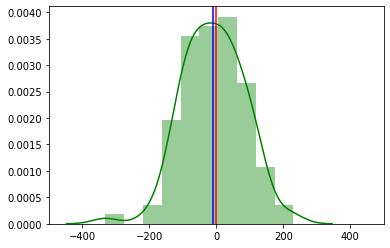

In [11]:
# кол-во объектов популяции
n_pop = 100000
# математическое ожидание (среднее) популяции
n_mean_pop = 0
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю) популяции
n_sigma_pop = 1000
# синтезируем генеральную совокупность (population)
population = np.random.normal(n_mean_pop, n_sigma_pop, n_pop)

# кол-во объектов каждой выборке
n_sample = 100
# синтезируем 100 выборок (sample) из популяции
samples = [population[np.random.randint(0, n_pop, n_sample)] for i in range(100)]
# найдем среднее каждой выборки
samples_means = list(map(lambda x: x.mean(), samples))
# отобразим распределение средних значений выборок
sns.distplot(samples_means, bins=10, color='g')
# отразим среднее генеральной совокупности
plt.axvline(n_mean_pop, c='r')
# отразим среднее распределения средних значений выборок
plt.axvline(np.mean(samples_means), c='b')
# зафиксируем размеры оси Х
plt.xlim(-500, 500)
plt.show()

# рассмотрим отдельно взятую выборку
sample = samples[0]
# вычислим для неё среднеквадратичное отклонение
sd_sample = np.std(sample)
# теперь можно вычислить стандартную ошибку среднего
se = sd_sample / np.sqrt(n_sample)
# и среднее выборки
sample_mean = sample.mean()

Может возникнуть вопрос: а как этот факт можно использовать на практике? При проведении исследований мы же не можем позволить себе взять все возможные выборки и посчитать по ним средние значения, выборка у нас, как правило, одна. На самом деле знание о среднем и стандартном отклонении распределения статистической оценки дает нам две важные практические вещи:  
1) позволяет посчитать доверительный интервал для интересующего параметра (обсудим позже);  
2) дает представление о соотношении точности оценки и размера выборки.

Мы знаем, что стандартное отклонение отвечает за то, насколько сильно значения разбросаны относительно среднего. Если мы хотим получить более точную оценку, то мы хотим, чтобы разброс ее возможных значений был небольшим, то есть, чтобы стандартное отклонение оценки было маленьким. Как этого добиться в случае среднего? Стандартное отклонение среднего равно $\frac{\sigma}{\sqrt{n}}$, причем $\sigma$ - стандартное отклонение генеральной совокупности - не изменяется (оно одно), а размер выборки $n$ мы можем менять. Получается, чтобы стандартное отклонение среднего было достаточно маленьким, нужно взять достаточно большую выборку.

Тут мы и приходим к ***закону больших чисел***. Согласно закону больших чисел, с увеличением размера выборки, среднее значение выборки становится ближе к среднему значению генеральной совокупности. Другими словами, чтобы получить более точную оценку среднего генеральной совокупности, нужно взять достаточно большую выборку.

Понаблюдаем за действием закона больших чисел на примере. Из генеральной совокупности, описанной выше (нормально распределенной со средним 0 и стандартным отклонением 1000) будем брать выборки разного размера и смотреть, насколько сильно средние значения выборок сконцентрированы относительно среднего генерального совокупности. 
Для начала возьмем 1000 выборок размера 2, посчитаем по ним средние значения и построем для них гистограмму:

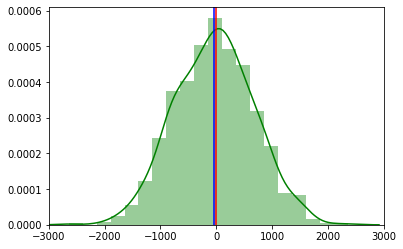

In [12]:
# кол-во объектов каждой выборке
n_sample = 2
# синтезируем 100 выборок (sample) из популяции
samples = [population[np.random.randint(0, n_pop, n_sample)] for i in range(1000)]
# найдем среднее каждой выборки
samples_means = list(map(lambda x: x.mean(), samples))
# отобразим распределение средних значений выборок
sns.distplot(samples_means, bins=20, color='g')
# отразим среднее генеральной совокупности
plt.axvline(n_mean_pop, c='r')
# отразим среднее распределения средних значений выборок
plt.axvline(np.mean(samples_means), c='b')
# зафиксируем размеры оси Х
plt.xlim(-3000, 3000)
plt.show()

# рассмотрим отдельно взятую выборку
sample = samples[0]
# вычислим для неё среднеквадратичное отклонение
sd_sample = np.std(sample)
# теперь можно вычислить стандартную ошибку среднего
se = sd_sample / np.sqrt(n_sample)
#  и среднее выборки
sample_mean = sample.mean()

Видно, что значения достаточно сильно разбросаны относительно среднего генеральной совокупности (отмечено красной линией). А теперь возьмем и проделаем то же самое для выборок размера 10:

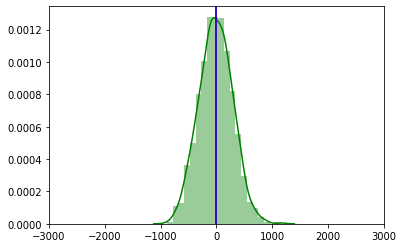

In [13]:
# кол-во объектов каждой выборке
n_sample = 10
# синтезируем 100 выборок (sample) из популяции
samples = [population[np.random.randint(0, n_pop, n_sample)] for i in range(1000)]
# найдем среднее каждой выборки
samples_means = list(map(lambda  x: x.mean(), samples))
# отобразим распределение средних значений выборок
sns.distplot(samples_means, bins=20, color='g')
# отразим среднее генеральной совокупности
plt.axvline(n_mean_pop, c='r')
# отразим среднее распределения средних значений выборок
plt.axvline(np.mean(samples_means), c='b')
# зафиксируем размеры оси Х
plt.xlim(-3000, 3000)
plt.show()

# рассмотрим отдельно взятую выборку
sample = samples[0]
# вычислим для неё среднеквадратичное отклонение
sd_sample = np.std(sample)
# теперь можно вычислить стандартную ошибку среднего
se = sd_sample / np.sqrt(n_sample)
#  и среднее выборки
sample_mean = sample.mean()

Заметно, что в данном случае средние значения уже более сконцентрированы вокруг среднего генеральной совокупности, график "более узкий". Попробуем взять выборки большего размера, по 400 наблюдений:

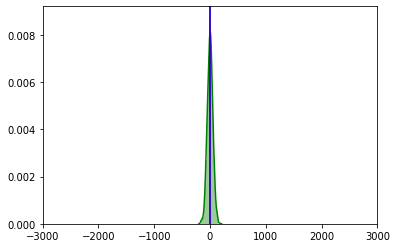

In [14]:
# кол-во объектов каждой выборке
n_sample = 400
# синтезируем 100 выборок (sample) из популяции
samples = [population[np.random.randint(0, n_pop, n_sample)] for i in range(1000)]
# найдем среднее каждой выборки
samples_means = list(map(lambda x: x.mean(), samples))
# отобразим распределение средних значений выборок
sns.distplot(samples_means, bins=20, color='g')
# отразим среднее генеральной совокупности
plt.axvline(n_mean_pop, c='r')
# отразим среднее распределения средних значений выборок
plt.axvline(np.mean(samples_means), c='b')
# зафиксируем размеры оси Х
plt.xlim(-3000, 3000)
plt.show()

# рассмотрим отдельно взятую выборку
sample = samples[0]
# вычислим для неё среднеквадратичное отклонение
sd_sample = np.std(sample)
# теперь можно вычислить стандартную ошибку среднего
se = sd_sample / np.sqrt(n_sample)
# и среднее выборки
sample_mean = sample.mean()

График стал "совсем узким", разброс средних значений по выборкам стал очень маленьким, то есть мы получили достаточно точные оценки среднего значения генеральной совокупности.

In [15]:
n_samples = range(1000)
means_of_samples_means = []
for n in n_samples:
    samples = [population[np.random.randint(0, n_pop, n)] for i in range(100)]
    samples_means = list(map(lambda x: x.mean(), samples))
    means_of_samples_means += [np.mean(samples_means)]

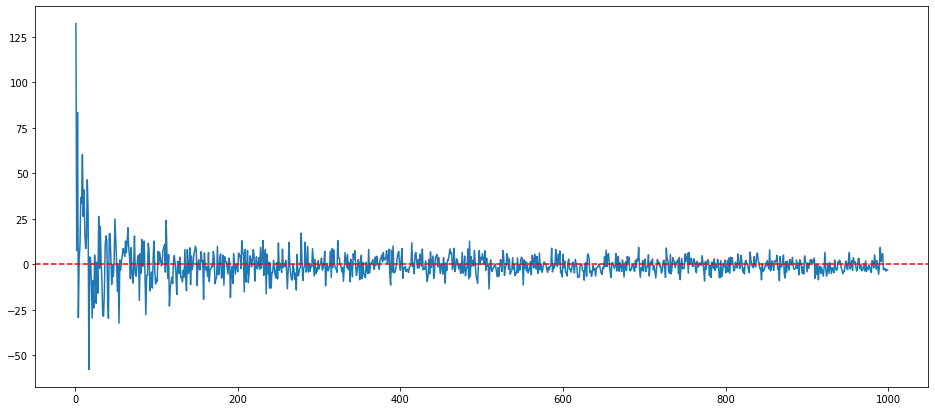

In [16]:
fig = plt.figure(figsize=(16, 7))
sns.lineplot(n_samples, means_of_samples_means)
# отразим среднее генеральной совокупности
plt.axhline(n_mean_pop, c='r', linestyle='--')
plt.show()

По такому графику хорошо видно, что с ростом размера выборки, выборочное среднее все ближе становится к среднему генеральной совокупности.

### 1.8. Доверительные интервалы

Представьте, что нам необходимо оценить долю людей в России, которые любят рано вставать по утрам. Всех жителей России опросить не получится, но мы можем случайным образом выбрать 100 человек, провести опрос и выяснить, сколько среди них любителей вставать по утрам. Допустим, интересующая нас доля равна 0.17. Устроит ли нас такая оценка? С одной стороны, устроит: выборка хорошая и достаточно большая. С другой стороны, какая бы выборка не была, мы не можем однозначно утверждать, что 17% россиян любят вставать по утрам, потому что, когда мы оцениваем долю по выборке, мы получаем значение с некоторой погрешностью. Что же мы можем в таком случае сделать? Зафиксировать уровень уверенности в наших расчетах и вместо одного значения для доли определить интервал, в пределах которого эта доля находится. Другими словами, мы можем построить ***доверительный интервал***.

Построение доверительного интервала обычно выглядит следующим образом. У нас есть $\theta$ параметр (например, доля людей, любящих вставать по утрам, по всей России), который мы не знаем, но хотим оценить. Оцениваем его по выборке ($\overline{\theta}$) и делаем это с какой-то погрешностью. Мы допускаем, что при оценивании параметра по выборке максимум, что мы можем позволить - это отклониться от истинного значения параметра на некоторую величину, которая называется ***предельной ошибкой выборки ($\epsilon$)***.

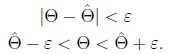

Значение предельной ошибки зависит от ***уровня доверия***, который мы выбираем. Обычно в исследованиях используется уровень доверия 95%, иногда 90% и 99%. Что означает уровень доверия? Степень уверенности в оценках, которые мы будем получать на наших данных. Если мы будем повторять аналогичное исследование много раз, независимо друг от друга, в 95% случаев истинное значение параметра будет попадать в доверительный интервал. Например, мы захотели построить 95%-ный доверительный интервал для доли людей в России, которые любят вставать по утрам. Определили, что предельная ошибка выборки $\epsilon = 0.07$. Это означает, что если мы будем проводить аналогичное исследование 100 раз, в 95 случаях доля любителей рано вставать, посчитанная по выборке, будет отклоняться от доли любителей рано вставать по всей России не больше, чем на 0.07 (считая, что предельная ошибка выборки не изменяется от выборки к выборке, то есть от исследования к исследованию).

Как считается предельная ошибка?



где $const$ - это некоторое число, которое зависит от выбранного уровня доверия, а $se$ - это стандартная ошибка. ***Стандартная ошибка*** - это стандартное отклонение оценки, посчитанное по выборке. Для удобства разберем на примере оценки среднего значения. 
Оценка среднего значения генеральной совокупности - случайная величина, которая имеет примерно нормальное распределение со средним $\mu$ и стандартным отклонением $\frac{\sigma}{\sqrt{n}}$, где $\mu$ и $\sigma$ это среднее значение и стандартное отклонение генеральной совокупности, а $n$ - число наблюдений в выборке. Обычно стандартное отклонение генеральной совокупности нам неизвестно, но мы можем его приблизить с помощью стандартного отклонения по выборке:

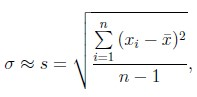

Вспомним основные показатели.  
$\mu$ - среднее генеральной совокупности (n_mean_pop = 0)  
$\sigma$  - стандартное отклонение генеральной совокупности (n_sigma_pop = 1000)

$n$ - размер выборки (n_sample = 400)  
$\overline{x}$ - выборочное среднее (sample_mean = -13.73 $\approx$ 0)  
$sd$ - среднеквадратичное отклонение выборки (sd_sample = 1075.9 $\approx \sigma$)  
$se = \frac{\sigma}{\sqrt{n}}$ - стандартная (ошибка) отклонение среднего (se = 50)

#### 1.8.1. Доверительные интервалы для доли

1. Нас интересует некоторая доля в генеральной совокупности $p$, ее мы не знаем, но хотим оценить. Можно говорить, что доля $p$ вероятность успеха.  
*Пример: доля людей, любящих вставать по утрам, среди всех жителей России.*
2. У нас есть выборка из $n$ наблюдений. Нам известна выборочная доля $\overline{p}$, оценка доли в генеральной совокупности; вероятность успеха, посчитанная по выборке.  
*Пример: доля людей, любящих вставать по утрам, среди всех людей в выборке.*
3. Нам известна выборочная доля $\overline{q}$ вероятность неудачи, посчитанная по выборке, $\overline{q} = 1 - \overline{p}$.  
*Пример: доля людей, не любящих вставать по утрам, среди всех людей в выборке.*

Значение стандартной ошибки в задачах с долями наъодится по следующей формуле:

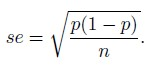
Тогда границы доверительного интервала определяются следующим образом:

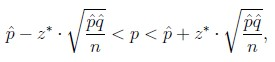

где $z^*$ значение z-статистики, соответствующее выбранному уровню доверия.

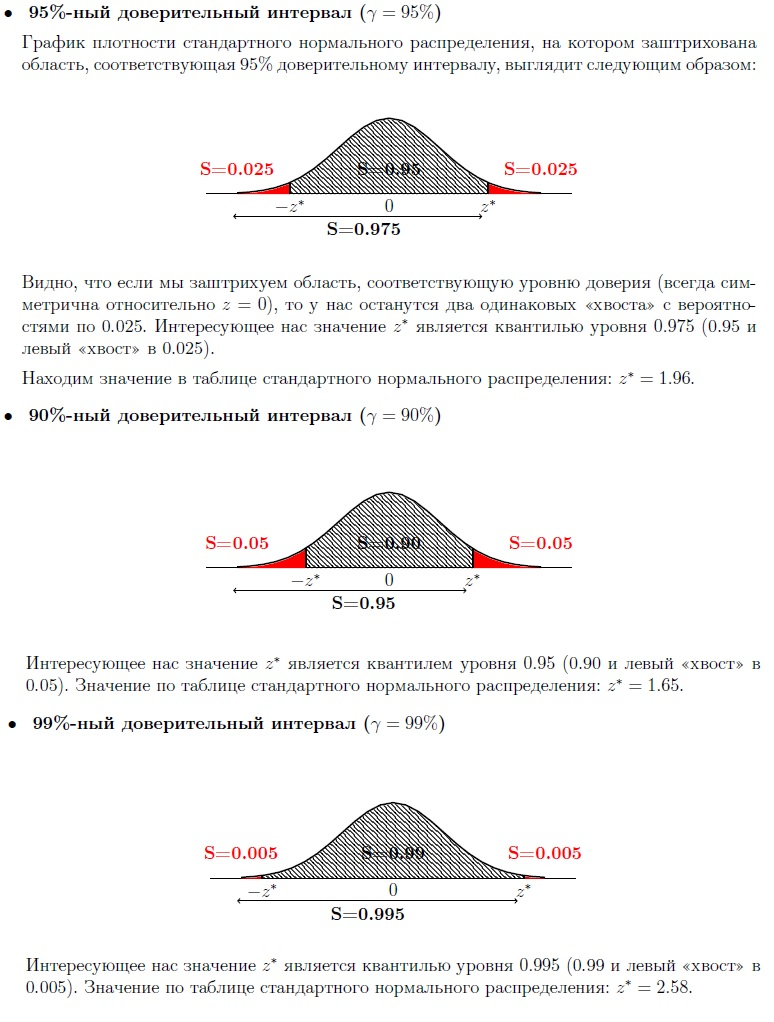

**Пример.**  
Дан массив *users*, состоящий из 0 и 1, где **0** соответствует людям, не кликнувшим на кнопку "Оформить
заказ", а **1** - людям, кликнувшим на кнопку "Оформить заказ".  
1. Используя Python, посчитайте и сохраните в переменную n общее число людей в группе число элементов массива users.
2. Используя Python, посчитайте и сохраните в переменную p долю единиц в массиве users (эта та доля, на основе которой мы строим доверительный интервал).
3. Посчитайте значение *стандартной ошибки доли* - показателя, который измеряет изменчивость значений в выборке, и сохраните результат в переменную se.

In [18]:
import scipy.stats as st


users = np.r_[np.zeros(40), np.ones(60)]
n = len(users)
p = sum(users)/n
q = 1 - p
se = np.sqrt(p*q/n)
confidence = 0.95
loc = np.mean(users)
scale = se
interval = st.norm.interval(confidence, loc, scale)
print('Доверительный интервал - [{}, {}]'.format(*interval))

Доверительный интервал - [0.5039817664728938, 0.6960182335271061]


0.6

В нашем решении мы использовали библиотечную функцию *st.norm.interval(confidence, loc, scale)*, где  
***confidence*** - уровень доверия,  
***loc*** - середина распределения, то есть интересующая нас доля,  
***scale*** - показатель разброса значений, то есть стандартная ошибка доли

#### 1.8.2. Доверительные интервалы для среднего

1. Нас интересует среднее значение генеральной совокупности , его мы не знаем, но хотим оценить.  
*Пример: средний рост студентов московских вузов.*
2. У нас есть выборка из n наблюдений. Нам известно выборочное среднее x и выборочное стандартное отклонение s.  
*Пример: средний рост студентов в выборке и стандартное отклонение значений роста студентов в выборке.*
Тогда границы доверительного интервала определяются следующим образом:

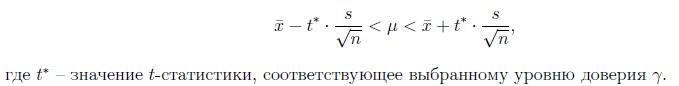

Значение $t$ для уровня доверия 95% - квантиль уровня 0.975 (та же логика, что и для $z$), число степеней свободы $df = n-1$, где n - число элементов в выборке. Аналогично для других уровней доверия.  
Например, для выборки в 25 наблюдений, $t^* = t(p=0.975, df=24) = 2.064$.

#### Интерпретация доверительного интервала

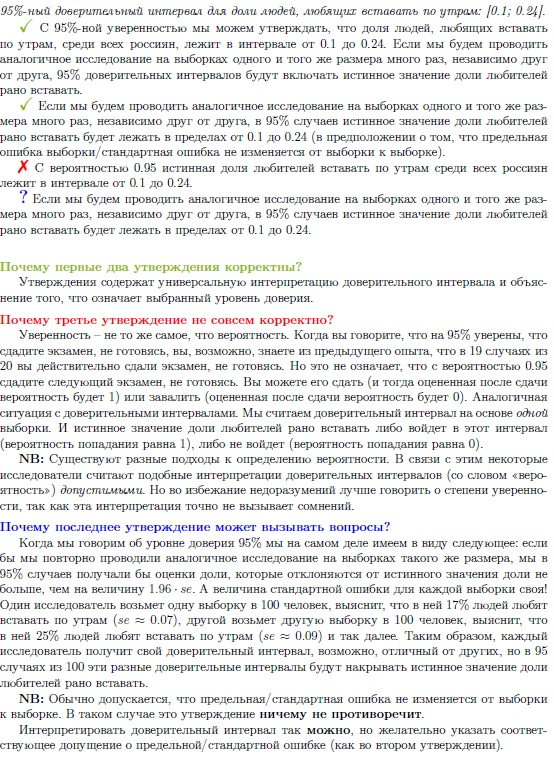

**Пример:**  
Постройте 95-процентный доверительный интервал для среднего возраста посетителей сайта, используя массив ages.

In [ ]:
import statsmodels.stats.api as stm


ages = np.array([23, 24, 34, 33, 38])
confidence = 0.95
interval = stm.DescrStatsW(ages).tconfint_mean(alpha=1-confidence, alternative='two-sided')
print('Доверительный интервал - [{}, {}]'.format(*interval))

Теперь взглянем на доверительный интервал для нашей выборке

In [ ]:
import statsmodels.stats.api as stm


left_95_conf, right_95_conf = stm.DescrStatsW(sample).tconfint_mean(alpha=1-confidence, alternative='two-sided')
# отобразим распределение выборки и границы доверительного интервала
sns.distplot(sample, bins=20)
plt.axvline(left_95_conf, c='r')
plt.axvline(right_95_conf, c='r')
plt.show()

### 1.9. Идея статистического вывода.
**Нулевая гипотеза (Н0)**: получившаяся выборка отражает генеральную совокупность.  
**Альтернативная гипотеза (Н1)**: получившаяся выборка не отражает генеральную совокупность.  
А теперь сравним **средние**. Среднее выборки и среднее генеральной совокупности. Просто интересно насколько выборка отличается от популяции.

In [ ]:
delta_mean = sample_mean - n_mean
delta_mean

Очень не показательно смотреть на абсолютные величины ведь в других экспериментах могут быть совсем другие разряды чисел.  
Именно поэтому рассмотрим эту дельту в единицах стандартных ошибках среднего, то есть перейдем на стандартную шкалу.
Это ещё называется *z-преобразованием*.

In [ ]:
z_delta_mean = (sample_mean - n_mean) / se
z_delta_mean

Итак, мы просто сопоставили среднее выборки и среднее популяции (как эталонное) в проекции отклонений выборки. Чем больше они
отличаются, тем больше отличаются выборки. Причем в данном случае мы учитываем размер выборки. Чем больше выборка,
тем сложнее назвать её случайностью.
А теперь просто взглянем, где у нас окажется получившееся значение на диаграмме распределения.

In [ ]:
# нормализуем наше распределение средних выборок
z_norm_distr = (np.array(samples_means) - n_mean_pop) / n_sigma_pop
# отобразим нормализованное распределение средних значений выборок
sns.distplot(z_norm_distr, bins=10, color='g')
# покажем получившуюся разницу в выборках
plt.axvline(z_delta_mean, c='r', label='Наша разница в средних')
plt.legend()
plt.show()

Как можно заметить эта разница "убежала" слишком далеко, чтобы считаться статистически возможной.

Далее, по найденному z_delta_mean мы определим p-уровень значимости.
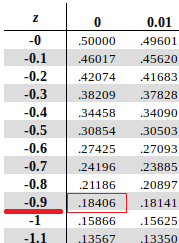

Умножаем найденное число на 2, так как мы строим симметрчный доверительный интервал.
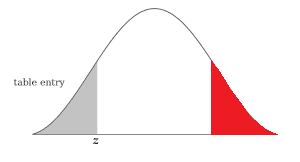
Однако в случае с *односторонним* принятем гипотезы **не надо** умножать на два!  
**p_value = 0.36812**, что в разы больше чем надо для того, чтобы не отвергать нулевую гипотезу.  
Мы просто сопоставим среднее выборки и среднее популяции (как эталонное) в проекции отклонений выборки. Чем больше они отличаются, тем больше отличаются выборки. Причем в данном случае мы учитываем размер выборки. Чем больше выборка, тем сложнее назвать её случайностью.  
Далее вычисляем **p-уровень** значимости (p-value). Если p_value < 0.05, то можно отклонить нулевую гипотезу. Если p_value > 0.05, то у нас недостаточно оснований отклонить нулевую гипотезу. Таким образом мы сможем понять процент похожести нашей выборки на популяцию и посмотрим на их похожесть.

___

**Мода**

Типы переменных: количественные и качественные (номинативные). Отдельный случай - ранговые.  

Репрезентативность выборки.  

___

## 2. Сравнение средних.
### 2.1. T-распределение.
Давайте еще раз взглянем на процесс проверки гипотезы. Пусть у нас имеется генеральная совокупность с известным средним.
К примеру мы знаем, что время выздоровления человека с применением лекарств 10 дней. Наш опыт заключался в том, чтобы
доказать, что без лекарств это переиод увеличится. Мы набрали 25 человек для проведения нашего эксперимента и получили
среднее время выздоровления 10.8 дней. Это статистически значимый результат или небольшое отклонение от общей картины?

In [ ]:
# математическое ожидание (среднее)
mean_pop = 10
# среднеквадратичное отклонение (иногда стандартное отклонение, но стандартное берет отклонения по модулю)
sigma_pop = 2
# кол-во объектов
n_pop = 100000
# синтезируем генеральную совокупность (population_pop)
population_pop = np.random.normal(mean_pop, sigma_pop, n_pop)

# среднее выборки
mean_sample = 10.8
# среднеквадратичное отклонение выборки
sigma_sample = 2
# кол-во объектов выборки
n_sample = 25
# синтезируем нашу выборку (population_sample)
population_sample = np.random.normal(mean_sample, sigma_sample, n_sample)

# отобразим наши выборки
sns.distplot(population_pop, label='population')
sns.distplot(population_sample, label=f'sample n={n_sample}')
plt.legend()
plt.show()

# для проверки гипотезы вычислим стандартную ошибку среднего
se = sigma_sample / np.sqrt(n_sample)
# а теперь вычислим разницу между получившимся средним и средним популяции
delta_mean = mean_sample - mean_pop
# нормализуем эту дельту
z_delta_mean = delta_mean / se
# получим следующее значение
print(z_delta_mean)

Что примерно равно **p-value=0.0455** и мы понимаем, что экспериментальное распределение не укладывается в общую картину распределения средних, тогда мы заключаем, что 10.8 дней это не случайность, а реальное изменение картины.  
Однако в жизни мы зачастую не знаем **сигму** у популяции. Именно поэтому мы перейдем к **T-распределению Стьюдента**.
И по нему наш p-уровень значимости для 25 объектов выборки будет равен **0.0569** и мы не сможем отвергнуть нулевую гипотезу о
равенстве двух выборок, как не сможем и сказать, что отсутствие лекарств влияет на время выздоровления.

In [ ]:
# так называемый t-критерий, который, на самом деле, мы уже рассчитали
t_student = (mean_sample-mean_pop) / (sigma_sample/np.sqrt(n_sample))
print(t_student)
# библиотечная возможность вычисления p-уровня значимости
from scipy import stats
print('p-value = ', (2*(1 - stats.t.cdf(t_student, df=24))))

На самом деле в случае с большим кол-вом объектов в нашей выборке (**30+**) получение значения критерия Стьюдента больше **2**
будет означать **отклонение** гипотезы, а в случае с меньшим будет означать невозможность отклонения. В этом и есть смысл так
называемых *степеней свободы (df)*, которые вычисляются исходя из размера выборки (df=n-1). Чем меньше размер выборки, тем
выше её вариабельность относительно реальных показателей, и это нужно учитывать. И это учитывается - чем меньше выборка, тем
более вариативное строится распределение Стьюдента, тем сильнее должны отличаться средние выборки и популяции, чтобы
претендовать на **статистическую значимость**. Проще говоря, чем меньше выборка, тем вероятнее, что она случайна.

### 2.2. Сравнение двух средних.
Для сравнения двух выборок используется *попарный t-test*. Рассмотрим две выборки. Нулевая гипотеза гласит о том, что эти
две выборки одинаковы и являются представителями одной генеральной совокупности. Альтернативная говорит об обратном.

In [ ]:
# среднее первой выборки
mean_sample_1 = 10.8
# среднеквадратичное отклонение первой выборки
sigma_sample_1 = 2
# кол-во объектов первой выборки
n_sample_1 = 10
# синтезируем первую выборку
sample_1 = np.random.normal(mean_sample_1, sigma_sample_1, n_sample_1)

# среднее второй выборки
mean_sample_2 = 10
# среднеквадратичное отклонение второй выборки
sigma_sample_2 = 1
# кол-во объектов второй выборки
n_sample_2 = 15
# синтезируем вторую выборку
sample_2 = np.random.normal(mean_sample_2, sigma_sample_2, n_sample_2)

# стандарнтая ошибка распределения разностей средних двух выборок
se = np.sqrt((sigma_sample_1**2)/n_sample_1 + (sigma_sample_2**2)/n_sample_2)
# степени свободы для такого распределения
df = n_sample_1 + n_sample_2 - 2
# t-значение для этих двух выборок
t_student = (mean_sample_1 - mean_sample_2) / se

Далее, зная *t-критерий* и *степень свободы* распределения можем вычислить *p-уровень* значимости и принять либо отвергнуть
нулевую гипотезу.

In [ ]:
print('p-value =', (2*(1 - stats.t.cdf(t_student, df=df))))

Итак, на основании значения p-value мы принимаем гипотезу о том, что две эти выборки принадлежат одной совокупности.
Интересно будет заметить, что если этих же показателей (среднее и СКО) добиться на большем кол-ве объектов в этих двух
выборках, то такие выборки уже не будут принадлежать одной популяции, а следовательно не равны между собой.

In [ ]:
n_sample_1 = 100
n_sample_2 = 150
se = np.sqrt((sigma_sample_1**2)/n_sample_1 + (sigma_sample_2**2)/n_sample_2)
df = n_sample_1 + n_sample_2 - 2
t_student = (mean_sample_1 - mean_sample_2) / se
p_value = 2*(1 - stats.t.cdf(t_student, df=df))
print('Для увеличенного кол-ва объектов выборок p-value =', p_value)

### 2.3. Проверка распределения на нормальность, QQ-plot.

In [ ]:
import scipy.stats as stats


# сформируем новую популяцию
sample_1 = np.random.normal(0, 1, 100000)
# бимодальная популяция
sample_2 = np.random.normal(5, 1, 50000)
sample = np.concatenate((sample_1, sample_2))

fig, axes = plt.subplots(4, 2, figsize=(12,10))
# посмотрим на её распределение
sns.distplot(sample_1, ax=axes[0, 0])
axes[0, 0].set_title('Normal distribution')
# теперь построим qq-plot
stats.probplot(sample_1, dist='norm', plot=axes[0, 1])
axes[0, 1].set_title('QQ-plot')

# визуализируем
sns.distplot(sample_1[sample_1>-1], ax=axes[1, 0])
axes[1, 0].set_title('Distribution with right outlier')
axes[1, 0].axvline(-1, c='r', alpha=0.2)
stats.probplot(sample_1[sample_1>-1], dist='norm', plot=axes[1, 1])
axes[1, 1].axhline(-1, c='r', alpha=0.2)
axes[1, 1].set_title('QQ-plot')

sns.distplot(sample_1[sample_1<1], ax=axes[2, 0])
axes[2, 0].set_title('Distribution with left outlier')
axes[2, 0].axvline(1, c='r', alpha=0.2)
stats.probplot(sample_1[sample_1<1], dist='norm', plot=axes[2, 1])
axes[2, 1].axhline(1, c='r', alpha=0.2)
axes[2, 1].set_title('QQ-plot')

sns.distplot(sample, ax=axes[3, 0])
axes[3, 0].set_title('Bimodal distribution')
stats.probplot(sample, dist='norm', plot=axes[3, 1])
axes[3, 1].set_title('QQ-plot')

plt.tight_layout()
plt.show()

А что делать если у нас завелись выбросы? Посмотрим как они могут повлиять на картину. Для начала посмотрим идеальную
картину.

In [ ]:
mean_pop, sigma_pop, n_pop = 0, 1, 100000
# генерируем популяцию
population = np.random.normal(mean_pop, sigma_pop, n_pop)
# возьмем из неё небольшую выборку
n_sample = 100
sample = population[np.random.randint(0, n_pop, n_sample)]
# проверим нулевую гипотезу о принадлежности нашей выборки популяции
def t_test(population, sample):
    # среднее популяции
    mean_pop = np.mean(population)
    # размер выборки
    n_sample = len(sample)
    # среднее выборки
    mean_sample = np.mean(sample)
    # СКО выборки
    sigma_sample = np.std(sample)
    # стандартная ошибка среднего
    se = sigma_sample / np.sqrt(n_sample)
    # t-критерий Стьюдента
    t_student = (mean_sample-mean_pop) / (sigma_sample/np.sqrt(n_sample))
    # p-уровень значимости
    p_value = 2*(1 - stats.t.cdf(t_student, df=n_sample-1))
    return p_value

t_test(population, sample)

Чтд. Основную гипотезу мы отвергнуть не можем, и не надо. А теперь добавим немного выбросов и посмотрим как себя поведет
t-test.

In [ ]:
for i in range(0, 4):
    sample[i] = np.random.randint(50, 100, 1)
t_test(population, sample)

Всего 4 % выбросов и мы принимаем альтернативную гипотезу говорящую о том, что эта выборка не принадлежит генеральной
совокупности. Вот такой эффект оказывают выбросы. В таких ситуациях необходимо использовать *Mann-Whitney U-test*. Такой
критерий гораздо менее чувствительный к выбросам, потому что преобразует все переменные в ранговые.

In [ ]:
import scipy as sp


sp.stats.mannwhitneyu(population, sample)[1]

Так гораздо лучше.

### 2.4. Однофакторный дисперсионный анализ.
Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется *независимой переменной*. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется *зависимая переменная*. 

In [ ]:
# синтезируем первую тройку выборок, не принадлежащую одной ген. совокупности
mean_sample_1 = 10
sigma_sample_1 = 1
n_sample_1 = 30
sample_1 = np.random.normal(mean_sample_1, sigma_sample_1, n_sample_1)

mean_sample_2 = 15
sigma_sample_2 = 1.5
n_sample_2 = 30
sample_2 = np.random.normal(mean_sample_2, sigma_sample_2, n_sample_2)

mean_sample_3 = 20
sigma_sample_3 = 2
n_sample_3 = 30
sample_3 = np.random.normal(mean_sample_3, sigma_sample_3, n_sample_3)

Нулевая гипотеза будет гласить, что все они принадлежат одной популяции (mean_sample_1 = mean_sample_2 = mean_sample_3), а
альтернативная - хотя бы одно среднее отличается. Начнем с проверки основной гипотезы. Если мы считаем, что их средние
равняются, то можно высчитать их общее среднее.

In [ ]:
mean_samples_1 = np.mean(np.concatenate([sample_1, sample_2, sample_3]))

Переход к общему среднему поможет нам перейти к дисперсионному анализу, который начинается с *SST (total sum of square)*. Этот
параметр характеризует насколько высока изменчивость данных **без учета разделения их на группы**, то есть общая изменчивость общей выборки.  
SST может проистекать из *SSW (sum of square within groups)* (дисперсия внутри каждой группы) и *SSB (sum of square between groups) (межгрупповая дисперсия)*.

In [ ]:
samples = [sample_1, sample_2, sample_3]
samples_means = [mean_sample_1, mean_sample_2, mean_sample_3]
# SST
sst = sum([sum((group - mean_samples_1)**2) for group in samples])
# степени свободы при SST
sst_df = sum([len(group) for group in samples]) - 1
# SSW
ssw = sum([sum((group - group_mean)**2) for group, group_mean in zip(samples, samples_means)])
# степени свободы при SSW
ssw_df = sum([len(group) for group in samples]) - len(samples)
# SSB
ssb = sum([len(group)*(group_mean-mean_samples_1)**2 for group, group_mean in zip(samples, samples_means)])
# степени свободы при SSB
ssb_df = len(samples) - 1

Итак, как можно заметить, SST будто состоит из SSW и SSB. Это и правда так. Поэтому судить об изменчивости всех трех
групп (SST) можно по SSW и SSB. Какой показатель больше, тот и будет говорить о природе изменчивости всех трех групп (SST).
Ну а теперь рассчитаем основной статистический показатель дисперсионного анализа, т. н. F-значение.

In [ ]:
f_measure = (ssb/ssb_df) / (ssw/ssw_df)

Как можно заметить в числителе дроби стоит межгрупповая изменчивость, и в случае нулевой гипотезы (равенства всех средних)
она должна стремиться к нулю ведь все выборки выбраны из одной популяции; и наоборот, если выборки сделаны из разных популяций,
то F-значение будет стремиться к бесконечности.
Для интерпретации получившегося значения мы высчитаем p-уровень значимости, но уже по f-распределению.

In [ ]:
p_value = stats.f.cdf(f_measure, ssb_df, ssw_df)
print(p_value)

А теперь посмотрим, что скажет анализ на выборки из одной популяции.

In [ ]:
# оформим наш анализ в функцию
def one_way_ANOVA(samples:list):
    mean_samples = np.mean(np.concatenate(samples))
    samples_means = [np.mean(sample) for sample in samples]
    # SST
    sst = sum([sum((sample - mean_samples)**2) for sample in samples])
    # степени свободы при SST
    sst_df = sum([len(sample) for sample in samples]) - 1
    # SSW
    ssw = sum([sum((sample - sample_mean)**2) for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSW
    ssw_df = sum([len(sample) for sample in samples]) - len(samples)
    # SSB
    ssb = sum([len(sample)*(sample_mean-mean_samples)**2 for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSB
    ssb_df = len(samples) - 1
    # F-значение
    f_measure = (ssb/ssb_df) / (ssw/ssw_df)
    # вероятность правильности нулевой гипотезы (не путать с p-value)
    p = 1-stats.f.cdf(f_measure, ssb_df, ssw_df)
    return p

print('Вероятность того, что выборки принадлежат одной генеральной совокупности -', one_way_ANOVA(samples))
# а теперь синтезируем три выборки из одной популяции
population = np.random.normal(0, 1, 100000)
same_samples = [population[np.random.randint(0, 100000, 100)] for _ in range(2)]
print('Вероятность того, что выборки принадлежат одной генеральной совокупности -', one_way_ANOVA(same_samples))

Ну, собственно, результат на лицо, вероятность подтверждения нулевой гипотезы возрастает в разы.

### 2.5. Множественные сравнения ANOVA.
Посмотрим ошибку t-тестa на большом кол-ве выборок.

In [ ]:
yes, no = 0, 0
for _ in range(1000):
    sample = population[np.random.randint(0, 100000, 100)]
    if t_test(population, sample) < 0.05:
        yes += 1
    else:
        no += 1
print(yes)
print(no)

Как можно заметить бывают случаи, когда t-test ошибается. Но это не так страшно, ведь в процентном соотношении всё
остаётся неизменным. Другая ситуация обстоит с дисперсионным анализом, а конкретно с кол-вом сравниваемых групп. Давайте
взглянем как поведет себя ANOVA на большом кол-ве групп.

In [ ]:
yes, no = 0, 0
for i in range(1000):
    samples_ = [population[np.random.randint(0, 100000, 20)] for _ in range(2000)]
    if one_way_ANOVA(samples_) < 0.05:
        yes += 1
    else:
        no += 1
print(yes)
print(no)

***Так. Здесь должно показательное увеличение yes, но что-то пошло не так. Стоит проверить подсчет p-value на датасете из
2.5.***  
В случае большого кол-ва выборок неминуемо, что одна из них будет портить всю картину. Поэтому стоит уменьшать порог 0.05,
чтобы не все наборы выборок могли претендовать на статистически различные. Для этого существует поправка Бонферони.
Высчитывается она просто:  
*кол-во выборок в сравнении* * *(кол-во выборок в сравнении - 1)* / 2.

### 999. A/B тестирование
#### 999.1. Расчет необходимого объема выборки
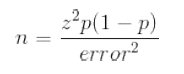
***p*** – ожидаемое значение доли (которое ожидаем еще до проведения тестирования),  
***error*** – максимальная погрешность (ошибка), которую мы хотим допускать при получении результатов,  
***z*** – значение стандартной нормальной величины, которое соответствует выбранному уровню доверия.  
**Пример:**  
Для маркетингового исследования случайным образом необходимо отобрать N людей. Этим людям
далее демонстрируется шоколад марки "Аленка" в упаковке с новым дизайном: вместо цветной обертки
– обертка в бежево-коричневых тонах, с эффектом под старину для усиления ностальгии, с одной
стороны, и для привлечения новой аудитории, кто не сразу узнает классическую "Аленку", с другой
стороны. После этого фиксируется, сколько людей захотели купить этот шоколад, а точнее, доля таких
людей. Группа экспертов ожидает, что, в целом, 70% людей захотят купить этот шоколад.
Определите необходимый размер выборки N, считая, что мы принимаем уровень доверия равный 90%
и хотим получать погрешность не более 2%.

In [ ]:
p = 0.7
p_value = 0.9
error = 0.02
# так как мы работаем с СИММЕТРИЧНЫМ доверительным интервалом и принимаем уровень доверия равный 90%, то p_value = 5% и 95%
p_value_left = 0.05
p_value_right = 0.95
z_score_left = st.norm.ppf(p_value_left)
z_score_right = st.norm.ppf(p_value_right)
print('left: {}, right: {}'.format(z_score_left, z_score_right))

In [ ]:
n = z_score_right**2 * p * (1 - p) / error**2
print('Необходимый объем выборки для исследования - {} человек'.format(int(round(n))))

Если брать какие-нибудь другие сферы кроме маркетинга, например социологию, то там выборка в **1600** человек является стандартом. И на самом деле на значение 1600 респондентов ориентируется во всех сферах. Есть смысл рассчитывать точный объем выборки в том случае, когда мы ограничены в средствах, либо задача слишком специфична.  
Давайте взглянем на зависимость объема выборки ($n$) от ожидаемого значения доли ($p$).

In [ ]:
# построим все ожидаемые значения долей
x_p = np.arange(0.01, 0.99, 0.01)
# посчитаем объемы выборок, соответсвующие ожидаемым значениям долей
y_n = [st.norm.ppf(p_value_right)**2 * p*(1-p) / error**2 for p in x_p]
# отобразим зависимость объема выборок от ожидаемых значений долей
sns.lineplot(x_p, y_n)
# значение доли, соответсвующее максимальному значению выборки
plt.axvline(x_p[np.argmax(y_n)], c='r', linestyle='--')
plt.show()

print('Максимальное значение выборки - {}, соответствует значению доли - {}'.format(int(round(max(y_n))), x_p[np.argmax(y_n)]))

Мы видим, что объем выборки максимален в случае, когда мы считаем, что шансы выбрать и не выбрать кофе одинаковы - 0.5. Можно ведь сказать, что эта самая неопределенная ситация из всех возможных, так как любое отклонение от 50%/50% уже увеличивает уверенность в одном из вариантов. Поэтому можно заключить, что размер выборки тем больше, чем больше неопределнность в размере доли.